In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

from __future__ import print_function

import os
from milleniumcohort import create_config
from UKMovementSensing import hsmm

import pandas as pd

In [4]:
config = create_config('../config.yml')
config.create_data_paths()

## Load the data

In [6]:
train_path = config.merged_path
filenames = os.listdir(train_path)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(train_path,fn))]
filenames = [os.path.join(train_path,filename) for filename in filenames]
print('Processing {} files'.format(len(filenames)))

Processing 2 files


In [7]:
datasets = [pd.read_csv(fn) for fn in filenames]
for i in range(len(datasets)):
    datasets[i] = datasets[i].set_index('timestamp')
    datasets[i].index = pd.to_datetime(datasets[i].index) 

In [8]:
# Take one example datset and have a look
example_index = 0
example_data = datasets[example_index]

example_data.head()

,acceleration,EN,anglex,angley,anglez,roll_med_acc_x,roll_med_acc_y,roll_med_acc_z,dev_roll_med_acc_x,dev_roll_med_acc_y,...,heuristic,filename,subset,switched_pos,binFile,day,slot,activity,label,start_time
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-02-14 10:15:00,0.003022,0.999880,-0.997402,79.742593,-10.207752,-0.017414,0.984437,-0.177293,0.000098,-0.000612,...,7,__016564_2015-02-26 13-35-02.bin_day1.csv,0,False,__016564_2015-02-26 13-35-02.bin,1,38,1,Sleeping and resting (including sick in bed),2015-02-14T10:10:00+0000
2015-02-14 10:15:05,0.002932,1.000364,-1.007548,79.741508,-10.207717,-0.017592,0.984437,-0.177293,-0.000591,-0.000197,...,7,__016564_2015-02-26 13-35-02.bin_day1.csv,0,False,__016564_2015-02-26 13-35-02.bin,1,38,1,Sleeping and resting (including sick in bed),2015-02-14T10:10:00+0000
2015-02-14 10:15:10,0.003020,0.999924,-0.997402,79.742593,-10.207752,-0.017414,0.984437,-0.177293,-0.000571,-0.000690,...,7,__016564_2015-02-26 13-35-02.bin_day1.csv,0,False,__016564_2015-02-26 13-35-02.bin,1,38,1,Sleeping and resting (including sick in bed),2015-02-14T10:10:00+0000
2015-02-14 10:15:15,0.003231,1.001102,-0.995710,79.729873,-10.220700,-0.017385,0.984419,-0.177520,-0.000292,0.000523,...,7,__016564_2015-02-26 13-35-02.bin_day1.csv,0,False,__016564_2015-02-26 13-35-02.bin,1,38,1,Sleeping and resting (including sick in bed),2015-02-14T10:10:00+0000
2015-02-14 10:15:20,0.003127,1.000546,-0.991327,79.718720,-10.232340,-0.017308,0.984345,-0.177713,-0.001061,0.000059,...,7,__016564_2015-02-26 13-35-02.bin_day1.csv,0,False,__016564_2015-02-26 13-35-02.bin,1,38,1,Sleeping and resting (including sick in bed),2015-02-14T10:10:00+0000


## Prepare data for HSMM

In [10]:
X_list = [d[config.hsmmconfig.column_names].as_matrix() for d in datasets]

## Train HSMM

Training iteration 0
Resampled 2 sequences in 4.7 seconds
Log likelihood:  42969.4489153
Convergence: average Hamming distance is 0.930594679186
Training iteration 1
Resampled 2 sequences in 4.4 seconds
Log likelihood:  54372.3138211
Convergence: average Hamming distance is 0.290258215962


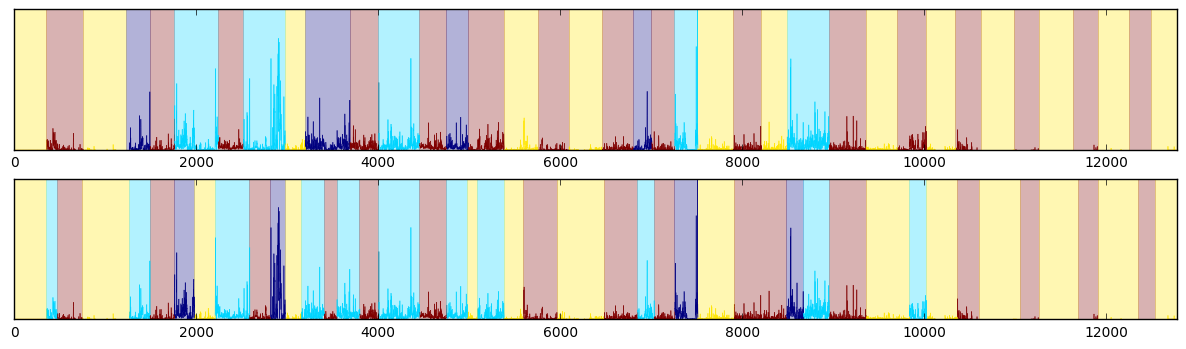

In [21]:
#Note that with many iterations, the visualization becomes badly visible
model = hsmm.train_hsmm(X_list, Nmax=config.hsmmconfig.Nmax,
                                        nr_resamples=config.hsmmconfig.nr_resamples,
                                        save_model_path=config.model_path,
                                        trunc=config.hsmmconfig.truncate, visualize=True, verbose=True)

## Plot one example

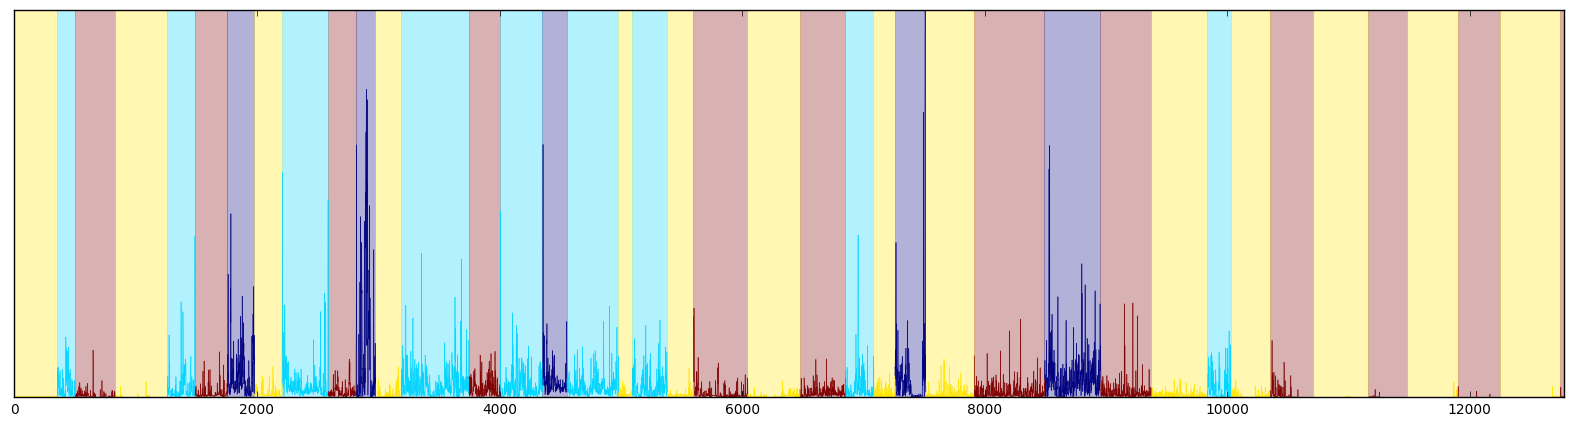

In [14]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20, 5))
model.plot_stateseq(example_index)

## Save the data with the states

Save the data including the states found. This labeled data serves as an input to the analyses.

In [15]:
for i, dat in enumerate(datasets):
    dat['state'] = model.stateseqs[i]
    fn = str(str(dat['subset'][0]) + dat['filename'][0])+'.csv'
    dat.to_csv(os.path.join(config.states_path, fn))

## Save the model

NB: This removes the data from the model! Only run this if you've saved the data with states.

In [17]:
import pickle
#Remove the data from the model
model.states_list = []

with open(config.model_file, 'wb') as f:
    pickle.dump(model, file=f)

## Save the config

In [19]:
from shutil import copyfile

copyfile('../config.yml', config.config_file)